    Cores  Matrix_Size  Execution_Time
0       1          100        0.012104
1       1          500        0.006006
2       1         1000        0.042867
3       1         2000        0.290474
4       2          100        0.000000
5       2          500        0.005001
6       2         1000        0.043816
7       2         2000        0.289917
8       4          100        0.000000
9       4          500        0.006000
10      4         1000        0.037285
11      4         2000        0.281013


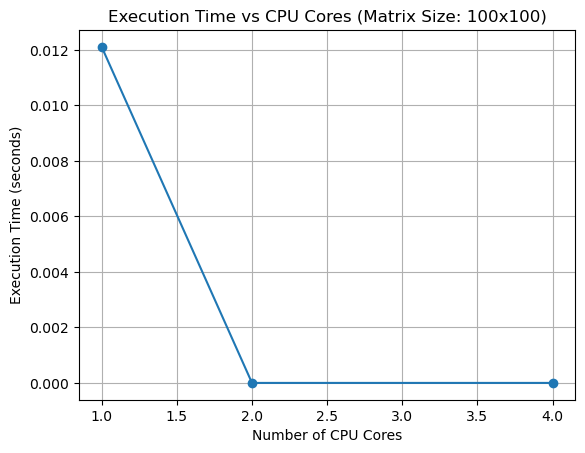

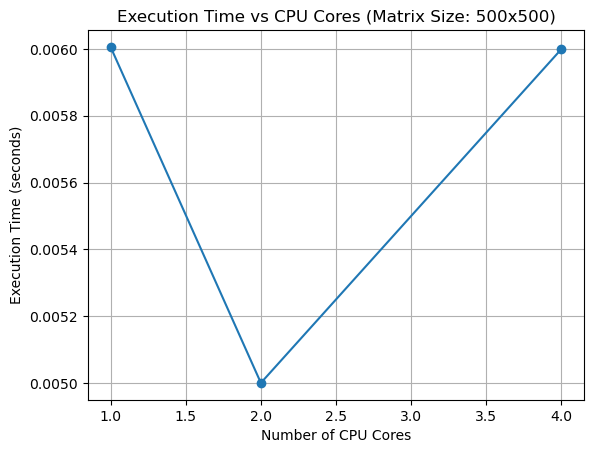

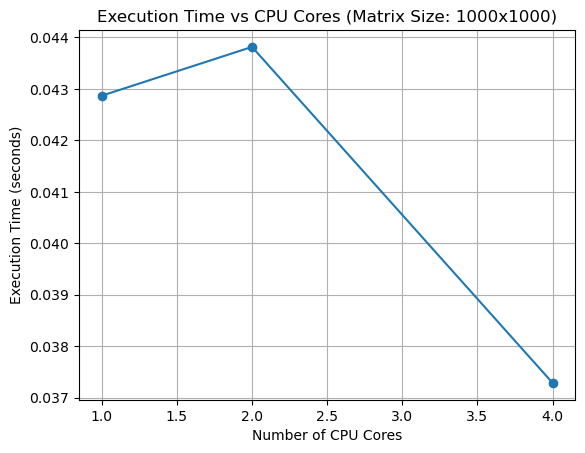

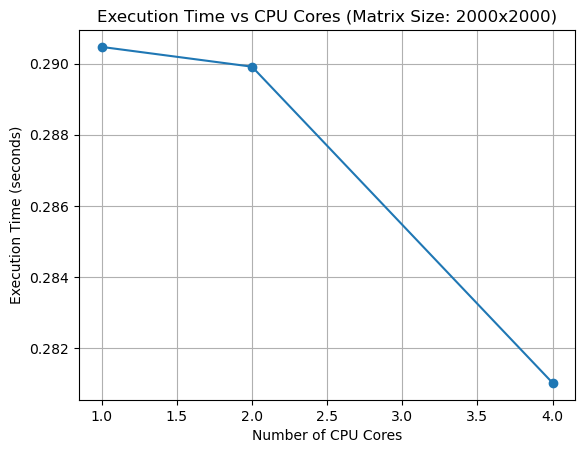

In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function for matrix multiplication (test algorithm)
def matrix_multiplication(size):
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)
    start_time = time.time()
    result = np.dot(A, B)
    end_time = time.time()
    return end_time - start_time

# Set matrix sizes for the experiment
matrix_sizes = [100, 500, 1000, 2000]
core_limits = [1, 2, 4]  # Simulating single-core, dual-core, and quad-core setups
results = []

# Perform experiments
for cores in core_limits:
    os.environ["OMP_NUM_THREADS"] = str(cores)  # Restrict CPU cores
    for size in matrix_sizes:
        exec_time = matrix_multiplication(size)
        results.append({"Cores": cores, "Matrix_Size": size, "Execution_Time": exec_time})

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Display results in table format
print(results_df)

# Plot results
for size in matrix_sizes:
    subset = results_df[results_df["Matrix_Size"] == size]
    plt.figure()
    plt.plot(subset["Cores"], subset["Execution_Time"], marker='o')
    plt.title(f"Execution Time vs CPU Cores (Matrix Size: {size}x{size})")
    plt.xlabel("Number of CPU Cores")
    plt.ylabel("Execution Time (seconds)")
    plt.grid(True)
    plt.show()
